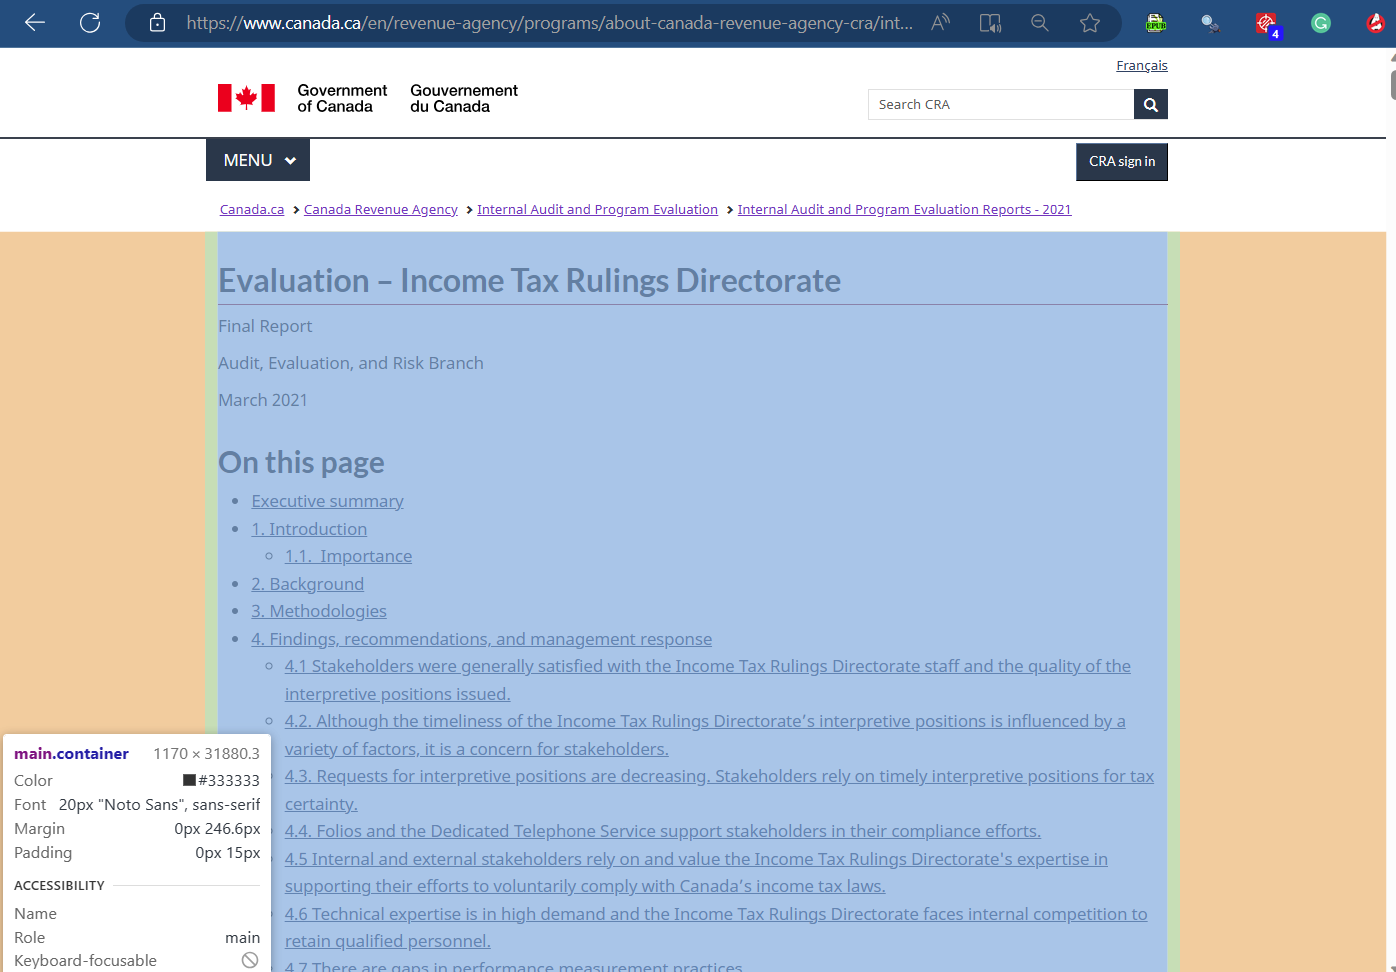

# Get CRA data and append relevant links

In [15]:
from bs4 import BeautifulSoup
import requests

#mainsite url with links to reports for all years: 'https://www.canada.ca/en/revenue-agency/programs/about-canada-revenue-agency-cra/internal-audit-program-evaluation.html'
  # sub-url's (links to reports for each year)

url = 'https://www.canada.ca/en/revenue-agency/programs/about-canada-revenue-agency-cra/internal-audit-program-evaluation.html'  #first page to scrape
response = requests.get(url)
content = response.content
soup = BeautifulSoup(content, 'html.parser') #load html of the main site

hrefs = []
relevant_links = []
for link in soup.find_all('a'): #iterate through all links of the mainsite url (for each year)
    href = link.get('href') # get a list of sub-urls for reports for each year
    if href and 'internal-audit-program-evaluation' in href:
      eval_report_url = 'https://www.canada.ca/'+ href
      curr_content =  requests.get(eval_report_url).content
      soup = BeautifulSoup(curr_content, 'html.parser')
      for nexpt_page_link in soup.find_all('a'):
        next_page_href = nexpt_page_link.get('href')
        text = nexpt_page_link.text.strip()
        if next_page_href and 'evaluation' in next_page_href and 'EVALUATION' in text.upper(): #check if the text portion and the url both contain the word "evaluation"
          relevant_links.append('https://www.canada.ca/'+next_page_href)

In [16]:
relevant_links_list = list(set(relevant_links))
relevant_links_list.remove('https://www.canada.ca//en/revenue-agency/programs/about-canada-revenue-agency-cra/internal-audit-program-evaluation.html')

In [17]:
relevant_links_list

['https://www.canada.ca//en/revenue-agency/programs/about-canada-revenue-agency-cra/internal-audit-program-evaluation/internal-audit-program-evaluation-reports-2008/gst-hst-registration-compliance-evaluation-study-non-registration.html',
 'https://www.canada.ca//en/revenue-agency/programs/about-canada-revenue-agency-cra/internal-audit-program-evaluation/internal-audit-program-evaluation-reports-2021/evaluation-income-tax-rulings-directorate.html',
 'https://www.canada.ca//en/revenue-agency/programs/about-canada-revenue-agency-cra/internal-audit-program-evaluation/internal-audit-program-evaluation-reports-2013/business-registration-evaluation-report.html',
 'https://www.canada.ca//en/revenue-agency/programs/about-canada-revenue-agency-cra/internal-audit-program-evaluation/internal-audit-program-evaluation-reports-2011/charities-partnership-outreach-program-summative-evaluation-report-1.html',
 'https://www.canada.ca//en/revenue-agency/programs/about-canada-revenue-agency-cra/internal-au

In [20]:
from bs4 import BeautifulSoup
import requests

def load_html_text(url):
    # Make a request to the URL and retrieve the HTML content
    response = requests.get(url)
    content = response.content

    # Parse the HTML content
    soup = BeautifulSoup(content, 'html.parser')

    # Extract all the text
    section_identifier = 'main[property="mainContentOfPage"][resource="#wb-main"][typeof="WebPageElement"][class="container"]'
    section = soup.select_one(section_identifier) #select texts only from a specific section
    all_text = section.get_text()
    return all_text

with open("cra_evaluation_reports.txt", "w") as text_file:
  for url in relevant_links_list:
    text_content = load_html_text(url)
    #print(text_content)
    text_file.write(text_content) #write all evaluation reports into a single .txt file